In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [6]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [7]:
df =  pd.read_csv("creditcard.csv")

/tmp/ipython-input-2107955042.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


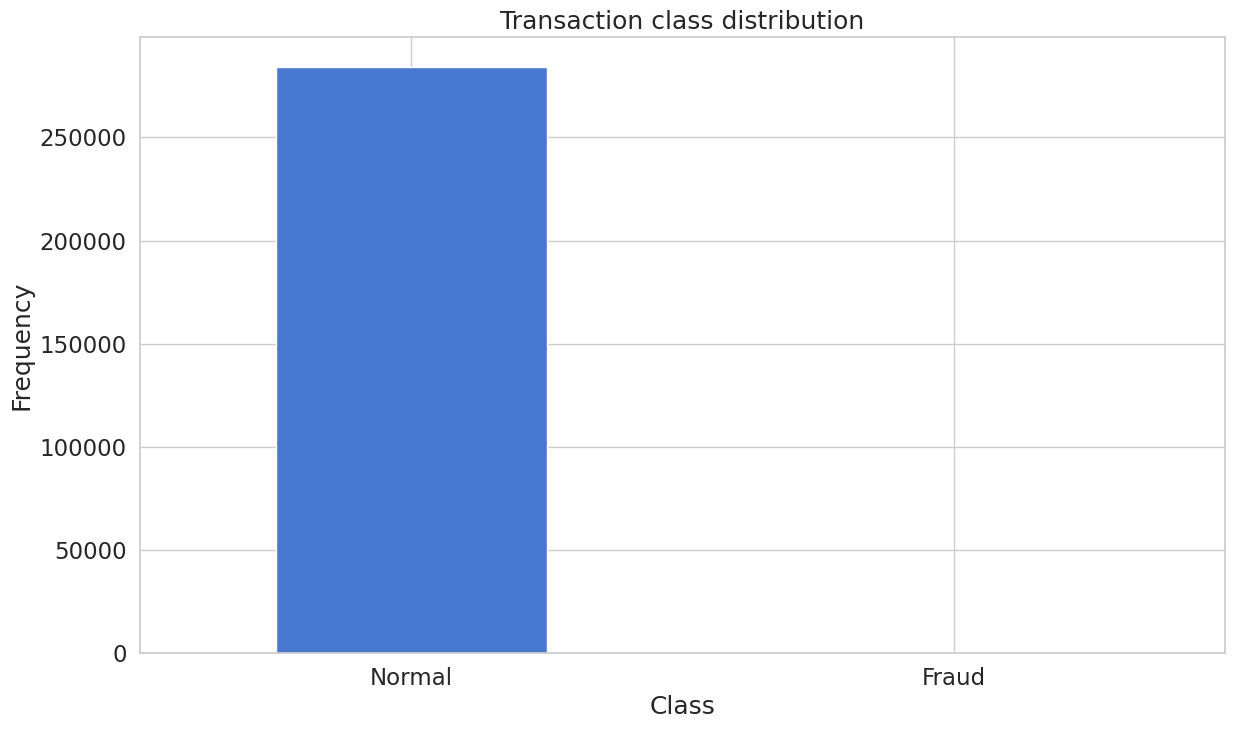

In [8]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [9]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))


In [10]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [11]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [12]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [14]:

nb_epoch = 10
batch_size = 32
early_stop = tf.keras.callbacks. EarlyStopping( monitor= 'val_loss', min_delta=0.0001, patience=10, verbose=1, mode='min',
                                               restore_best_weights=True)

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, early_stop]).history

Epoch 1/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6952 - loss: 0.7319

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.6952 - loss: 0.7319 - val_accuracy: 0.6969 - val_loss: 0.7647
Epoch 2/10
7104/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6982 - loss: 0.7422

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.6982 - loss: 0.7422 - val_accuracy: 0.6938 - val_loss: 0.7598
Epoch 3/10
7095/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6987 - loss: 0.7259

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.6987 - loss: 0.7259 - val_accuracy: 0.6962 - val_loss: 0.7576
Epoch 4/10
7103/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.7218

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.6998 - loss: 0.7218 - val_accuracy: 0.7059 - val_loss: 0.7551
Epoch 5/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7032 - loss: 0.7281 - val_accuracy: 0.7007 - val_loss: 0.7562
Epoch 6/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7018 - loss: 0.7099 - val_accuracy: 0.7004 - val_loss: 0.7555
Epoch 7/10
7093/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.7158

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7010 - loss: 0.7159 - val_accuracy: 0.7037 - val_loss: 0.7536
Epoch 8/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7011 - loss: 0.7340 - val_accuracy: 0.7014 - val_loss: 0.7550
Epoch 9/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7035 - loss: 0.7229 - val_accuracy: 0.6922 - val_loss: 0.7573
Epoch 10/10
7088/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7032 - loss: 0.7199

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7032 - loss: 0.7199 - val_accuracy: 0.7024 - val_loss: 0.7528
Restoring model weights from the end of the best epoch: 10.


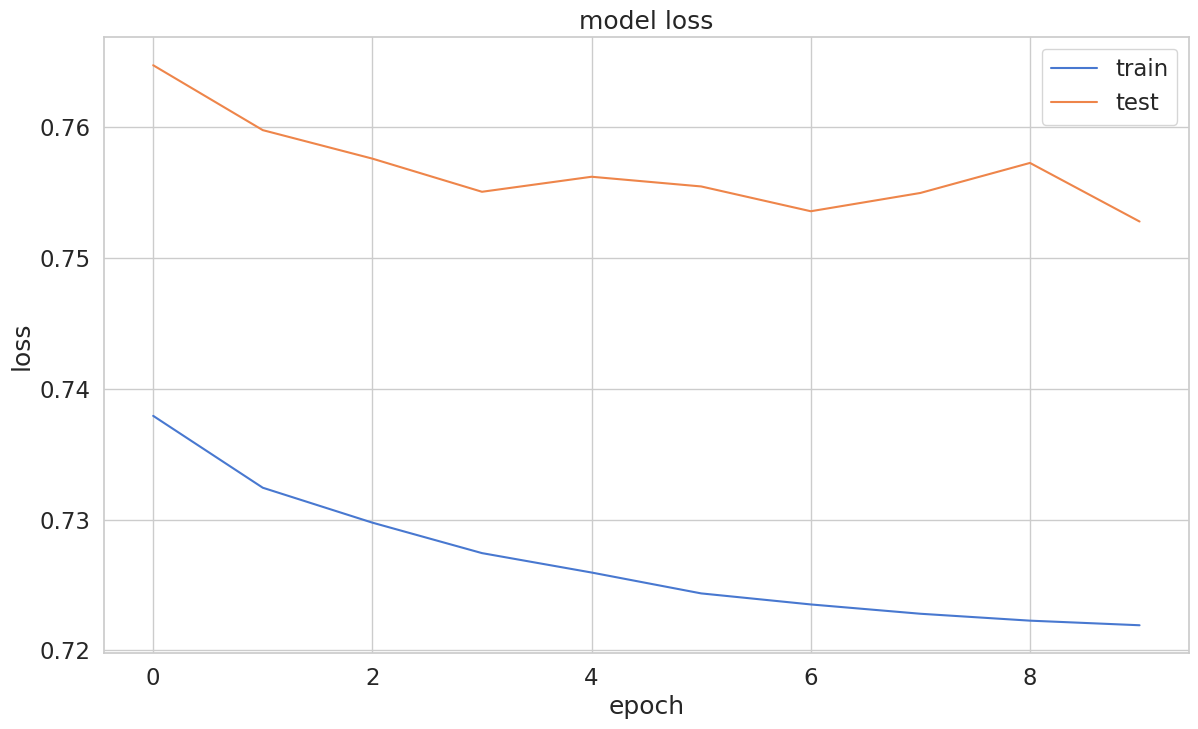

In [15]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [16]:
predictions = autoencoder.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [17]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [18]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.744574,0.001720
std,3.394922,0.041443
min,0.037785,0.000000
25%,0.241408,0.000000
50%,0.387456,0.000000
75%,0.617933,0.000000
max,256.404362,1.000000


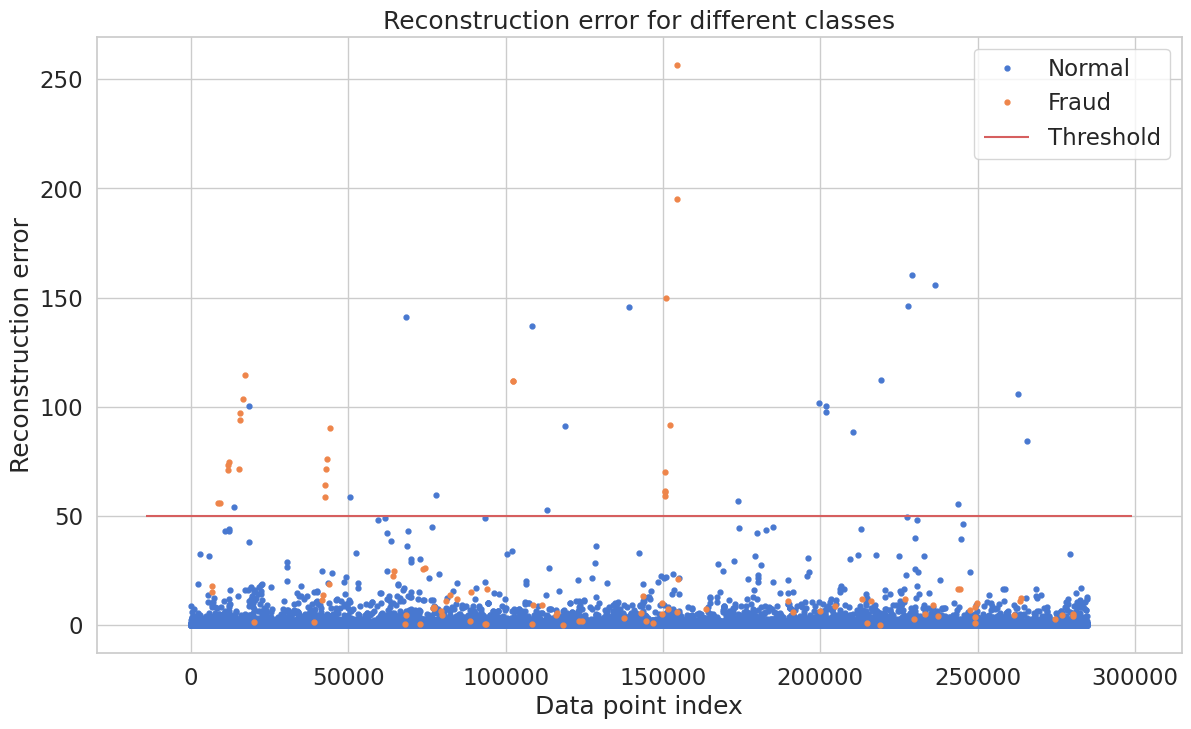

In [19]:
threshold = 50
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [20]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score

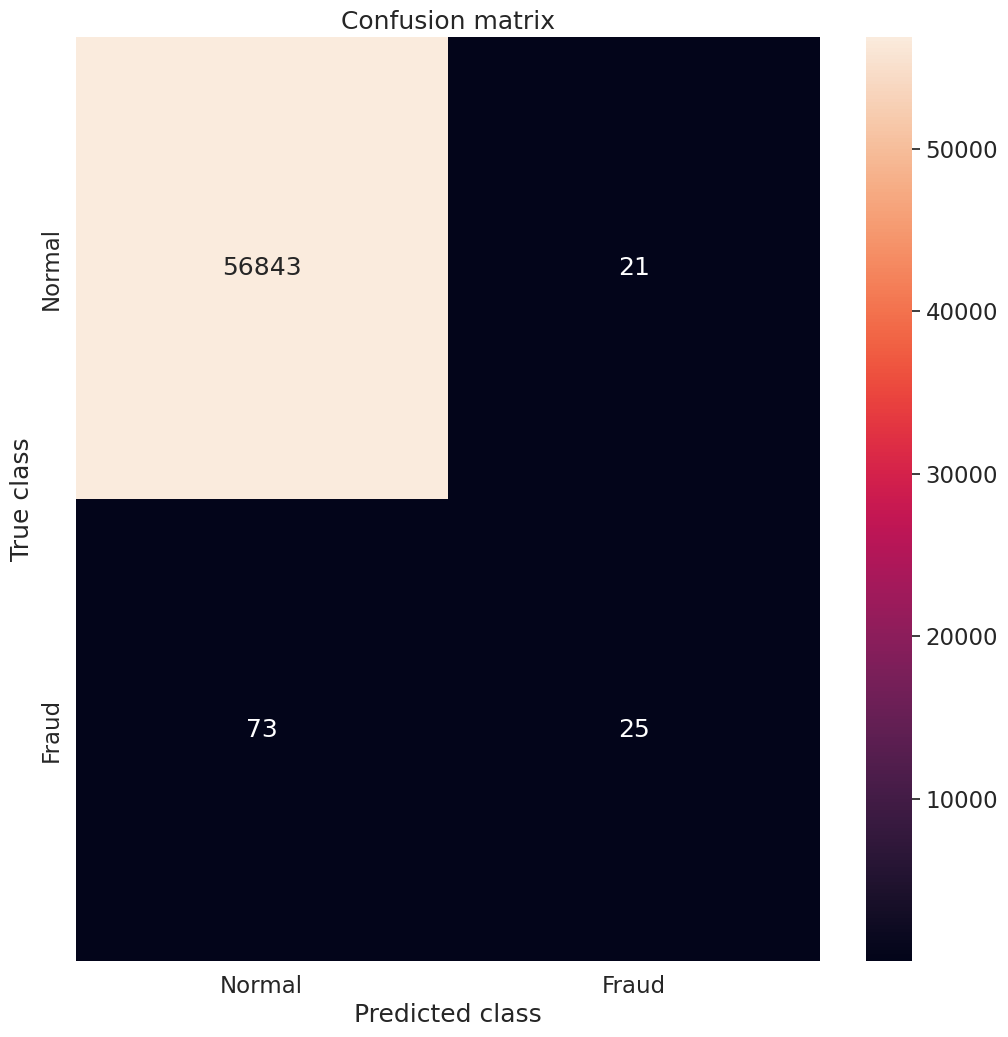

In [21]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [22]:
error_df['pred'] = y_pred

In [23]:
# print Accuracy, precision and recall print(" Accuracy:

print("Accuracy:",accuracy_score (error_df['true_class'],error_df['pred']))
print(" Recall:",recall_score(error_df['true_class'],error_df['pred']))
print(" Precision:",precision_score(error_df['true_class'],error_df['pred']))

Accuracy: 0.9983497770443454
 Recall: 0.25510204081632654
 Precision: 0.5434782608695652
